# MNIST CLASSIFICATION

**This notebook contains:** an overview of the MNIST dataset, visualization, the process of formatting the data, training, and identifying the best machine learning model for binary classification and multiclass classification.

### Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

### Fetching dataset

In [7]:
mnist = fetch_openml('mnist_784', as_frame=False)

### Exploring dataset

In [8]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [10]:
mnist.data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [11]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

In [12]:
mnist.categories

{'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']}

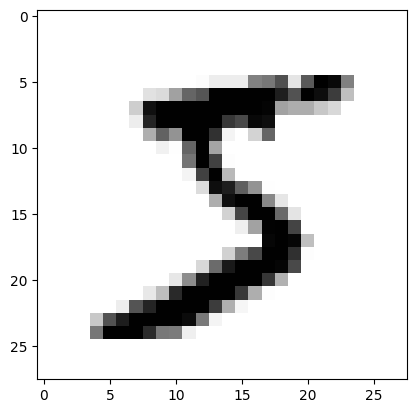

In [13]:
image = mnist.data[0].reshape(28,28)
plt.imshow(image, cmap='binary')
plt.show()

In [14]:
mnist.target[0]

'5'

### Creating training and test sets

In [15]:
# MNIST dataset is already split into training set (first 60000) and test set (last 10000)
X_train, X_test = mnist.data[:60_000], mnist.data[60_000:]
y_train, y_test = mnist.target[:60_000], mnist.target[60_000:] 

### Binary Classifier

In [16]:
y_train_0 = y_train == '0'
y_test_0 = y_test == '0'

#### Stochastic Gradient Descent Classifier

In [17]:
sgd_clf = SGDClassifier(random_state=42)

sgd_accuracy = cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring='accuracy')
pd.Series(sgd_accuracy).describe()

count    3.000000
mean     0.985533
std      0.000907
min      0.984700
25%      0.985050
50%      0.985400
75%      0.985950
max      0.986500
dtype: float64

In [18]:
y_train_predictions_sgd = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3)
y_train_predictions_sgd

array([False,  True, False, ..., False, False, False], shape=(60000,))

##### Confusion matrix

In [19]:
confusion_matrix(y_train_0, y_train_predictions_sgd)

array([[53486,   591],
       [  277,  5646]])

##### Precision and recall

In [20]:
precision_score(y_train_0, y_train_predictions_sgd)

0.9052429052429053

In [21]:
recall_score(y_train_0, y_train_predictions_sgd)

0.9532331588721932

In [22]:
f1_score(y_train_0, y_train_predictions_sgd)

0.9286184210526316

##### Precision / Recall Trade-of

In [23]:
y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3, method='decision_function')
y_scores_sgd

array([-24790.155884  ,  31562.50035756, -23872.95718613, ...,
       -28606.46843279, -19778.55970938, -11683.52453461], shape=(60000,))

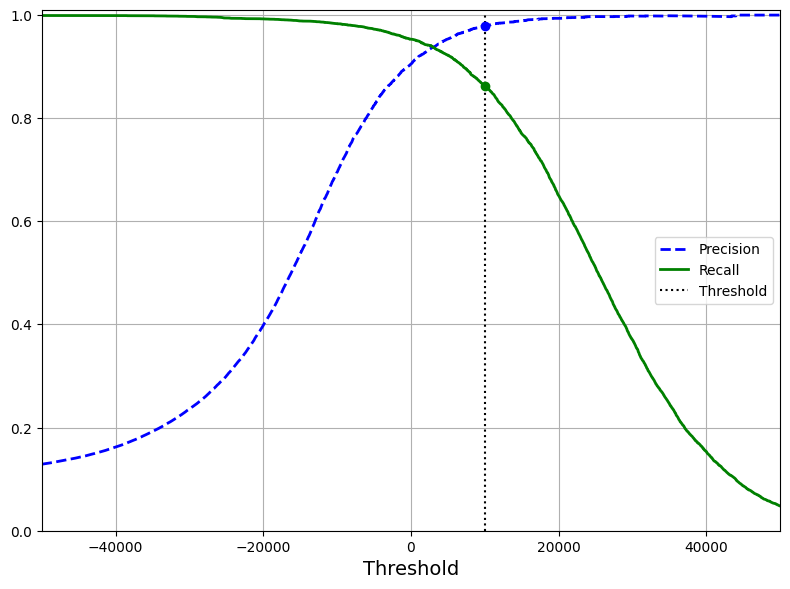

In [24]:
precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(y_train_0, y_scores_sgd)
threshold = 10_000

threshold_idx = np.argmin(np.abs(thresholds_sgd - threshold))

precision_at_threshold = precisions_sgd[threshold_idx]
recall_at_threshold = recalls_sgd[threshold_idx]

plt.figure(figsize=(8,6))
plt.plot(thresholds_sgd, precisions_sgd[:-1], 'b--', label='Precision', linewidth=2)
plt.plot(thresholds_sgd, recalls_sgd[:-1], 'g-', label='Recall', linewidth=2)
plt.vlines(threshold, 0, 1.0, 'k','dotted', label='Threshold')

plt.plot(threshold, precision_at_threshold, 'bo')
plt.plot(threshold, recall_at_threshold, 'go')

plt.xlim(-50_000, 50_000)
plt.ylim(0.0, 1.01)
plt.xlabel(xlabel='Threshold', size=14)
plt.grid()
plt.legend(loc='center right')
plt.tight_layout()
plt.show()

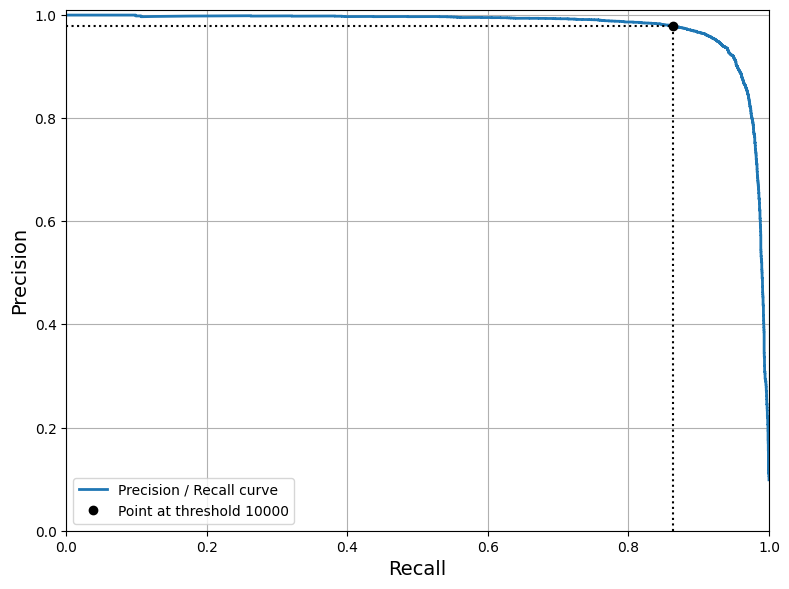

In [25]:
plt.figure(figsize=(8,6))
plt.plot(recalls_sgd, precisions_sgd, linewidth=2, label='Precision / Recall curve')

plt.vlines(recall_at_threshold, 0, precision_at_threshold, 'k','dotted')
plt.hlines(precision_at_threshold, 0, recall_at_threshold, 'k','dotted')
plt.plot(recall_at_threshold, precision_at_threshold, 'ko', label=f'Point at threshold {threshold}')

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.01)
plt.xlabel(xlabel='Recall', size=14)
plt.ylabel(ylabel='Precision', size=14)
plt.grid()
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

##### Receiver operating characteristic (ROC)

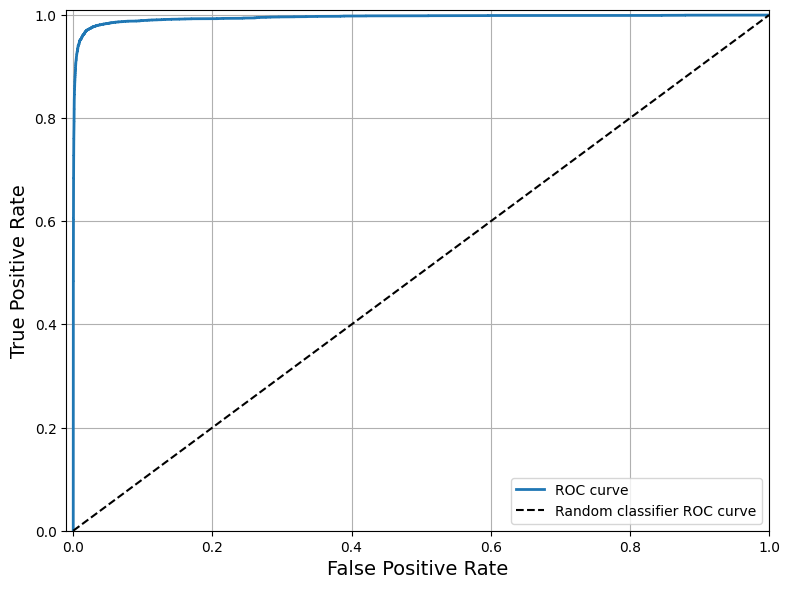

In [26]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train_0, y_scores_sgd)

plt.figure(figsize=(8,6))
plt.plot(fpr_sgd, tpr_sgd, linewidth=2, label='ROC curve')
plt.plot([0,1], [0,1], 'k--', label='Random classifier ROC curve')

plt.xlim(-0.01, 1.0)
plt.ylim(0.0, 1.01)
plt.xlabel(xlabel='False Positive Rate', size=14)
plt.ylabel(ylabel='True Positive Rate', size=14)
plt.grid()
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [27]:
roc_auc_score(y_train_0, y_scores_sgd)

0.9951089652363219

#### Random Forest Classifier

In [28]:
forest_clf = RandomForestClassifier(random_state=42)

forest_accuracy = cross_val_score(forest_clf, X_train, y_train_0, cv=3, scoring='accuracy')
pd.Series(forest_accuracy).describe()

count    3.000000
mean     0.993983
std      0.000675
min      0.993300
25%      0.993650
50%      0.994000
75%      0.994325
max      0.994650
dtype: float64

In [29]:
y_train_predictions_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3)
y_train_predictions_forest

array([False,  True, False, ..., False, False, False], shape=(60000,))

##### Confusion matrix

In [30]:
confusion_matrix(y_train_0, y_train_predictions_forest)

array([[54035,    42],
       [  319,  5604]])

##### Precision and recall

In [31]:
precision_score(y_train_0, y_train_predictions_forest)

0.9925611052072264

In [32]:
recall_score(y_train_0, y_train_predictions_forest)

0.9461421576903596

In [33]:
f1_score(y_train_0, y_train_predictions_forest)

0.9687959201313856

##### Precision / Recall Trade-of (with comparison to SGD)

In [34]:
y_probabilities_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3, method='predict_proba')
y_probabilities_forest

array([[1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.99, 0.01]], shape=(60000, 2))

In [35]:
y_scores_forest = y_probabilities_forest[:,1]
y_scores_forest

array([0.  , 1.  , 0.  , ..., 0.  , 0.05, 0.01], shape=(60000,))

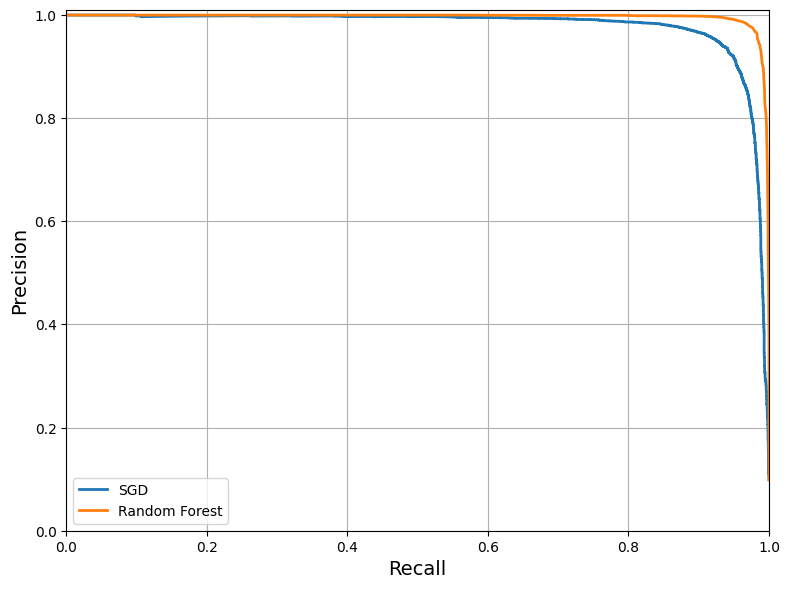

In [36]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_0, y_scores_forest)

plt.figure(figsize=(8,6))
plt.plot(recalls_sgd, precisions_sgd, linewidth=2, label='SGD')
plt.plot(recalls_forest, precisions_forest, linewidth=2, label='Random Forest')

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.01)
plt.xlabel(xlabel='Recall', size=14)
plt.ylabel(ylabel='Precision', size=14)
plt.grid()
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

#### Selecting and testing model

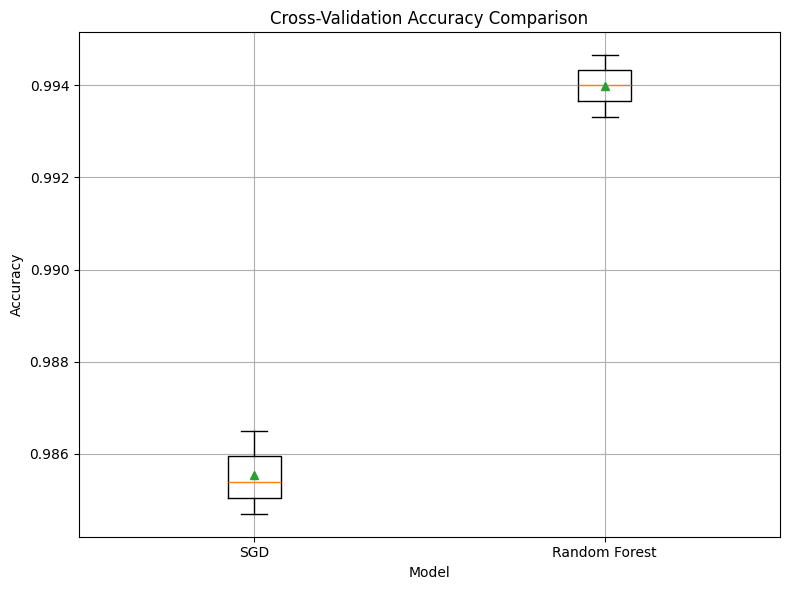

In [37]:
models_name = ['SGD', 'Random Forest']
results = [sgd_accuracy, forest_accuracy]

plt.figure(figsize=(8,6))
plt.boxplot(results, tick_labels=models_name, showmeans=True)
plt.title('Cross-Validation Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
final_model = forest_clf
final_model.fit(X_train, y_train_0)

final_accuracy = final_model.score(X_test, y_test_0)
final_accuracy

0.9972

### Multiclass Classification

#### Stochastic Gradient Descent Classifier

In [39]:
sgd_clf = SGDClassifier(random_state=42)

sgd_accuracy = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')
pd.Series(sgd_accuracy).describe()

count    3.000000
mean     0.866967
std      0.007831
min      0.858350
25%      0.863625
50%      0.868900
75%      0.871275
max      0.873650
dtype: float64

#### Random Forest Classifier

In [40]:
forest_clf = RandomForestClassifier(random_state=42)

forest_accuracy = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')
pd.Series(forest_accuracy).describe()

count    3.000000
mean     0.964583
std      0.002025
min      0.962550
25%      0.963575
50%      0.964600
75%      0.965600
max      0.966600
dtype: float64

#### K-nearest Neighbors Classifier

In [41]:
knn_clf = KNeighborsClassifier()

knn_accuracy = cross_val_score(knn_clf, X_train, y_train, cv=3, scoring='accuracy')
pd.Series(knn_accuracy).describe()

count    3.000000
mean     0.967417
std      0.000275
min      0.967100
25%      0.967325
50%      0.967550
75%      0.967575
max      0.967600
dtype: float64

#### Selecting and testing model

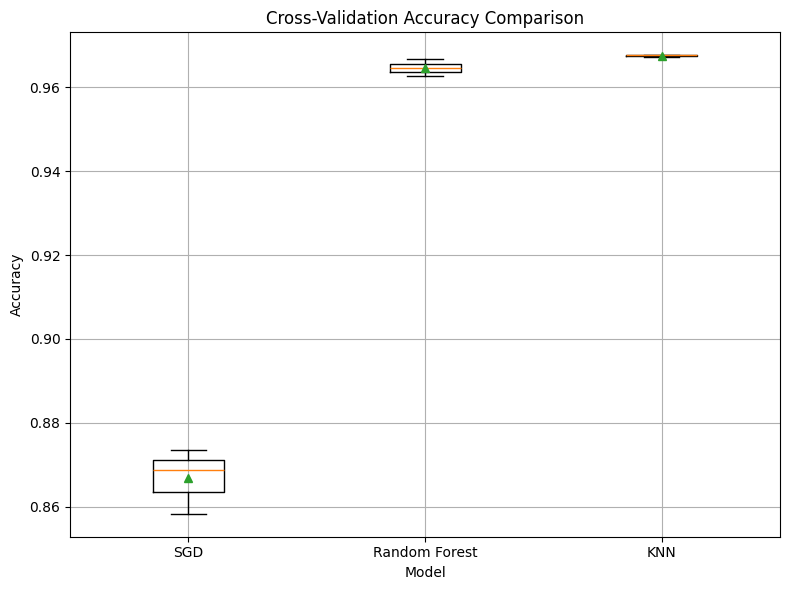

In [42]:
models_name = ['SGD', 'Random Forest', 'KNN']
results = [sgd_accuracy, forest_accuracy, knn_accuracy]

plt.figure(figsize=(8,6))
plt.boxplot(results, tick_labels=models_name, showmeans=True)

plt.yticks()
plt.title('Cross-Validation Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


full_pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__weights': ['uniform', 'distance'],
    'knn__n_neighbors': [2, 3, 4, 5, 6]
}

grid_search = GridSearchCV(
    full_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy')

grid_search.fit(X_train[:10_000], y_train[:10_000])
final_model = grid_search.best_estimator_

In [44]:
grid_search.best_score_

np.float64(0.9441999999999998)

In [45]:
grid_search.best_estimator_.fit(X_train, y_train)
final_model = grid_search.best_estimator_
final_accuracy = final_model.score(X_test, y_test)
final_accuracy

0.9714